In [12]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT2()
#Imports calibration data from csv files
modeldata = importakamadata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 14 fitted parameters, 10 of which have a bayesian prior
Total Residual:                        841.6
Components of residual:
Concentration Trajectories (Figure 2): 368.0
Initial Reaction Rate (Figure 3A):     176.2
Mg2PPi solubility (Figure 3B):         228.4
Parameter priors:                      69.1


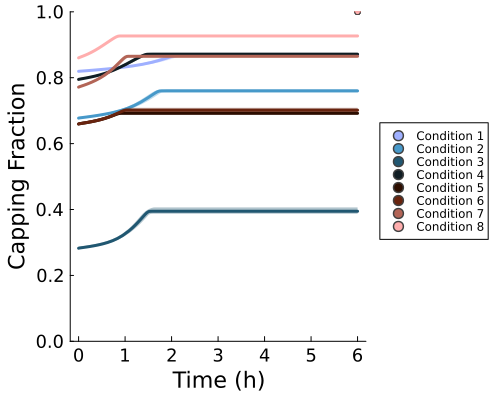

In [30]:
filename = "../data/internal/cappingtest.csv"
arrantaplot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 1:8,dataerrorbars = true, plotsize = (500,400), multiplot = false)